In [52]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

#!pip install grakel
from grakel import GraphKernel
from grakel.utils import graph_from_networkx


In [53]:
ratings = pd.read_csv( 'data/ratings.csv' )
tr = pd.read_csv( 'data/to_read.csv' )
b = pd.read_csv( 'data/books.csv' )

t = pd.read_csv( 'data/tags.csv' )
bt = pd.read_csv( 'data/book_tags.csv')

In [54]:
# To read data
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [55]:
max(tr.user_id)

53424

In [56]:
max(tr.book_id)

10000

In [57]:
len(tr.book_id.unique())

9986

In [58]:
len(tr.user_id.unique())

48871

In [59]:
tr['user_id'].value_counts()

user_id
38457    117
28259    114
38076    110
44530    108
46555    107
        ... 
49559      1
49768      1
3645       1
41692      1
21682      1
Name: count, Length: 48871, dtype: int64

In [60]:
tr['user_id'].value_counts().tail(10)

user_id
7205     1
12266    1
49779    1
12027    1
12260    1
49559    1
49768    1
3645     1
41692    1
21682    1
Name: count, dtype: int64

In [61]:
# Sample 10% of the data
tr_sampled = tr.sample(frac=0.1)
# Create a dictionary where the keys are book_ids and the values are sets of user_ids
book_users = defaultdict(set)

# Populate the dictionary
for _, row in tqdm(tr_sampled.iterrows(), total = tr_sampled.shape[0]):
    book_users[row['book_id']].add(row['user_id'])

# Create an empty graph
graph = nx.Graph()

# Iterate over each book
for book_id, users in tqdm(book_users.items(), total=len(book_users)):
    # Generate all pairs of users for this book
    user_pairs = combinations(users, 2)
    
    # Add edges between all pairs of users
    for user_pair in user_pairs:
        graph.add_edge(*user_pair)

# Print the number of nodes and edges in the graph
print(len(graph.nodes()))
print(len(graph.edges()))

100%|██████████| 9018/9018 [00:14<00:00, 628.67it/s] 

33323
1702114


In [62]:
graph.nodes()

NodeView((25793, 32418, 28482, 4709, 38352, 6864, 35152, 4243, 5236, 4702, 5983, 31104, 39937, 1666, 21507, 6163, 9496, 32030, 46901, 48573, 51647, 13888, 29121, 26178, 16590, 23380, 22110, 2665, 6890, 31596, 27377, 18163, 44917, 18936, 24954, 38395, 43134, 36066, 52009, 14736, 11377, 6707, 31539, 37752, 2296, 288, 40129, 16096, 39392, 32934, 16428, 2862, 719, 38707, 31444, 52021, 25302, 11795, 5119, 5949, 10463, 37380, 12295, 37385, 1037, 41489, 26130, 53272, 43551, 28194, 50723, 29222, 17449, 11312, 11827, 48695, 20036, 51793, 16994, 10343, 16999, 38506, 36976, 15480, 1658, 43648, 21136, 34449, 28312, 4771, 17065, 41643, 45242, 45255, 13001, 38095, 39632, 42708, 14036, 34007, 11486, 37087, 1761, 6889, 12531, 43251, 51448, 766, 11537, 8472, 12574, 45346, 13602, 21798, 13094, 10542, 21808, 23352, 10553, 37180, 42813, 30022, 9039, 14162, 38740, 23382, 39766, 13149, 42845, 38254, 22900, 27009, 24969, 15758, 37780, 19356, 16285, 8610, 16291, 43427, 14243, 31656, 2986, 3500, 40370, 51123, 

In [63]:
tr.query('user_id == 25793')

,user_id,book_id
2593,3085,287
2594,3085,8
2595,3085,89
2602,3085,67
2669,3085,495
2670,3085,65
2979,3085,336
4481,3085,9478
123731,3085,95
124695,3085,2879


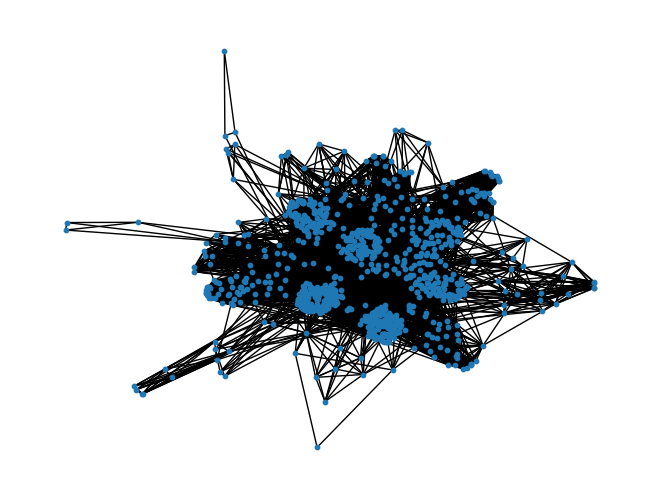

In [64]:
# Draw the graph only for a sample of nodes (all the nodes is too big)
sampled_nodes = list(graph.nodes())[:1000]
sampled_graph = graph.subgraph(sampled_nodes)

# Draw the graph
nx.draw(sampled_graph, with_labels=False, node_size=10)

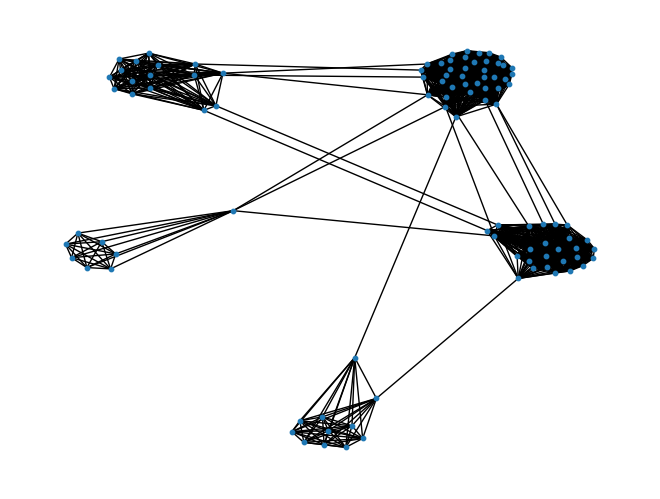

In [65]:
sampled_nodes = list(graph.nodes())[:100]
sampled_graph = graph.subgraph(sampled_nodes)

# Draw the graph
nx.draw(sampled_graph, with_labels=False, node_size=10)

Mean degree for the first 10 nodes: 9.0
Mean degree for the first 20 nodes: 9.1
Mean degree for the first 30 nodes: 15.133333333333333


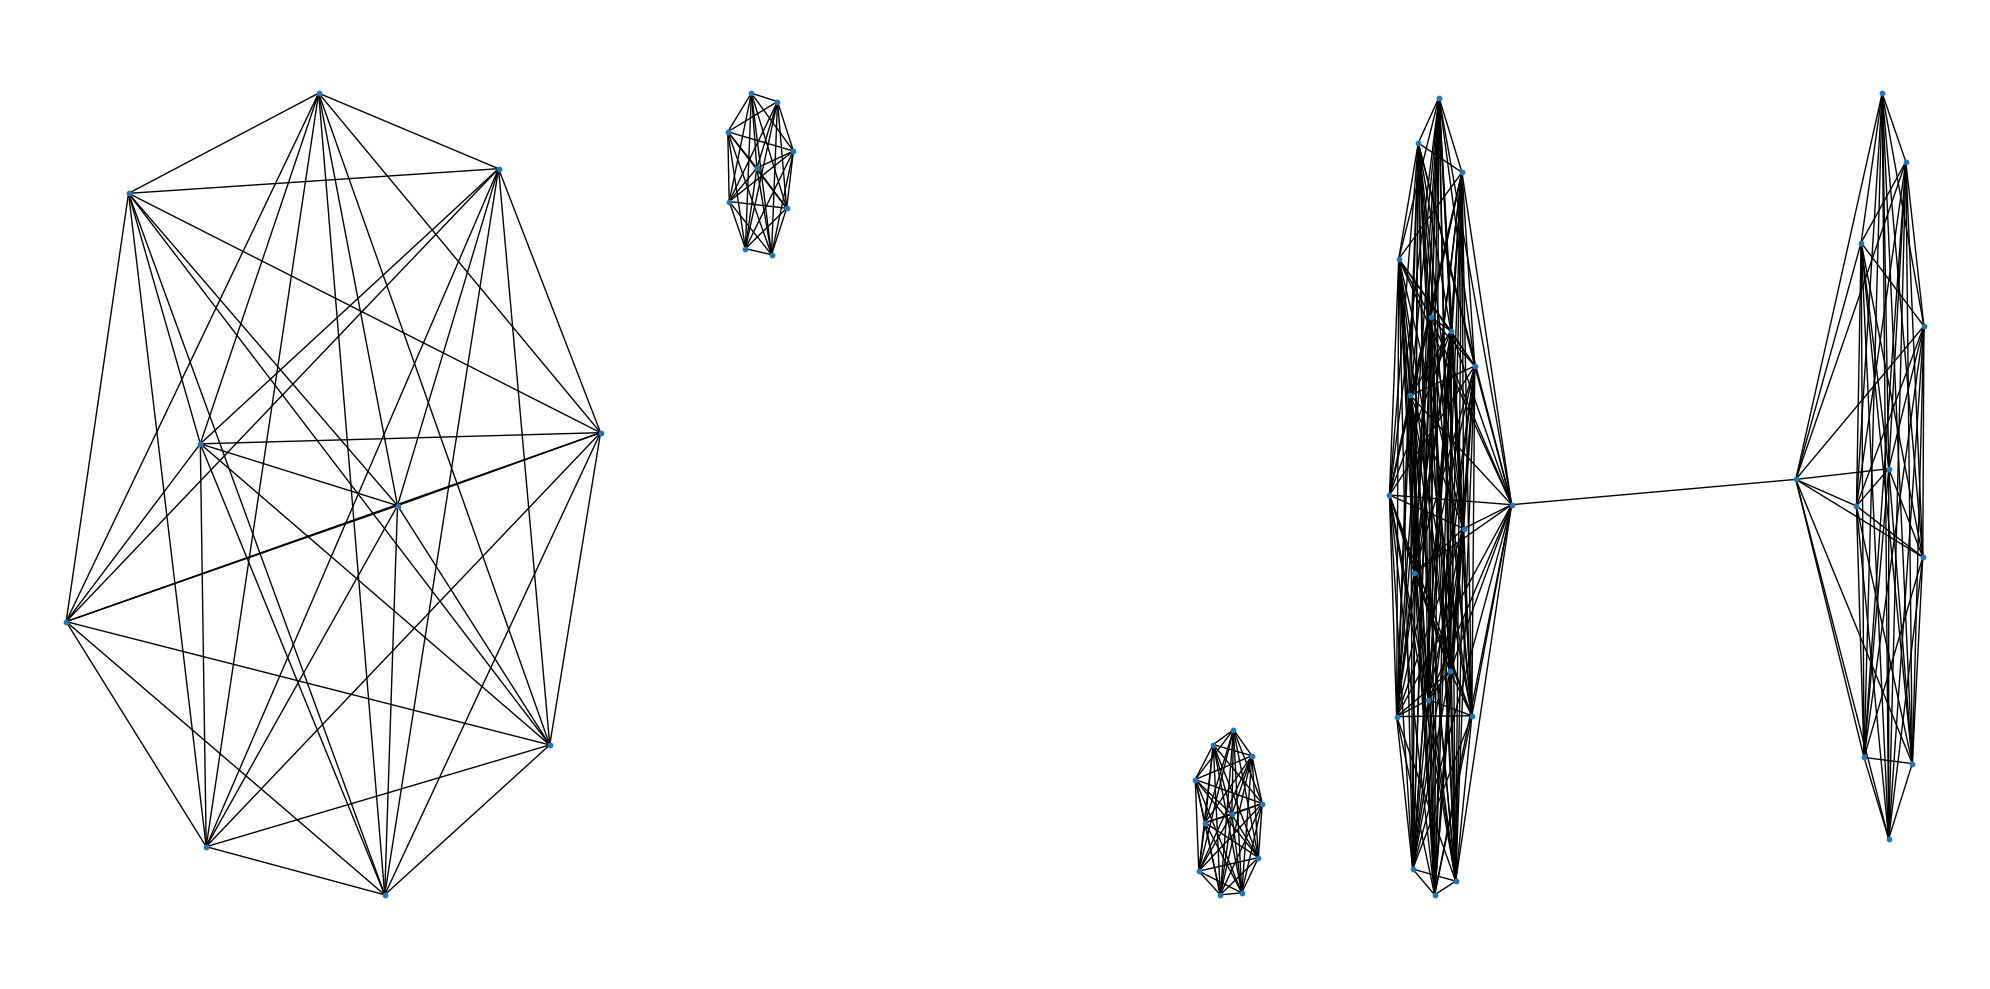

In [66]:
# Set up the figure and the grid of subplots
plt.figure(figsize=(20, 10))

sampled_nodes = list(graph.nodes())[:10]

# Iterate over the first 9 subplots
for i in range(3):
    # Get the first 10 * (i + 1) nodes
    sampled_nodes = list(graph.nodes())[:10 * (i + 1)]
    
    # Create a subgraph with the sampled nodes
    sampled_graph = graph.subgraph(sampled_nodes)

    degree = dict(sampled_graph.degree())
    mean_degree = np.mean(list(degree.values()))
    print(f"Mean degree for the first {len(sampled_nodes)} nodes: {mean_degree}")
    
    # Draw the subgraph and print the mean degree of the nodes present in this sampled graph

    
    plt.subplot(1, 3, i + 1)
    

    nx.draw(sampled_graph, with_labels=False, node_size=10)

plt.tight_layout()
plt.show()

100%|██████████| 10000/10000 [00:11<00:00, 864.84it/s]


1951
66674


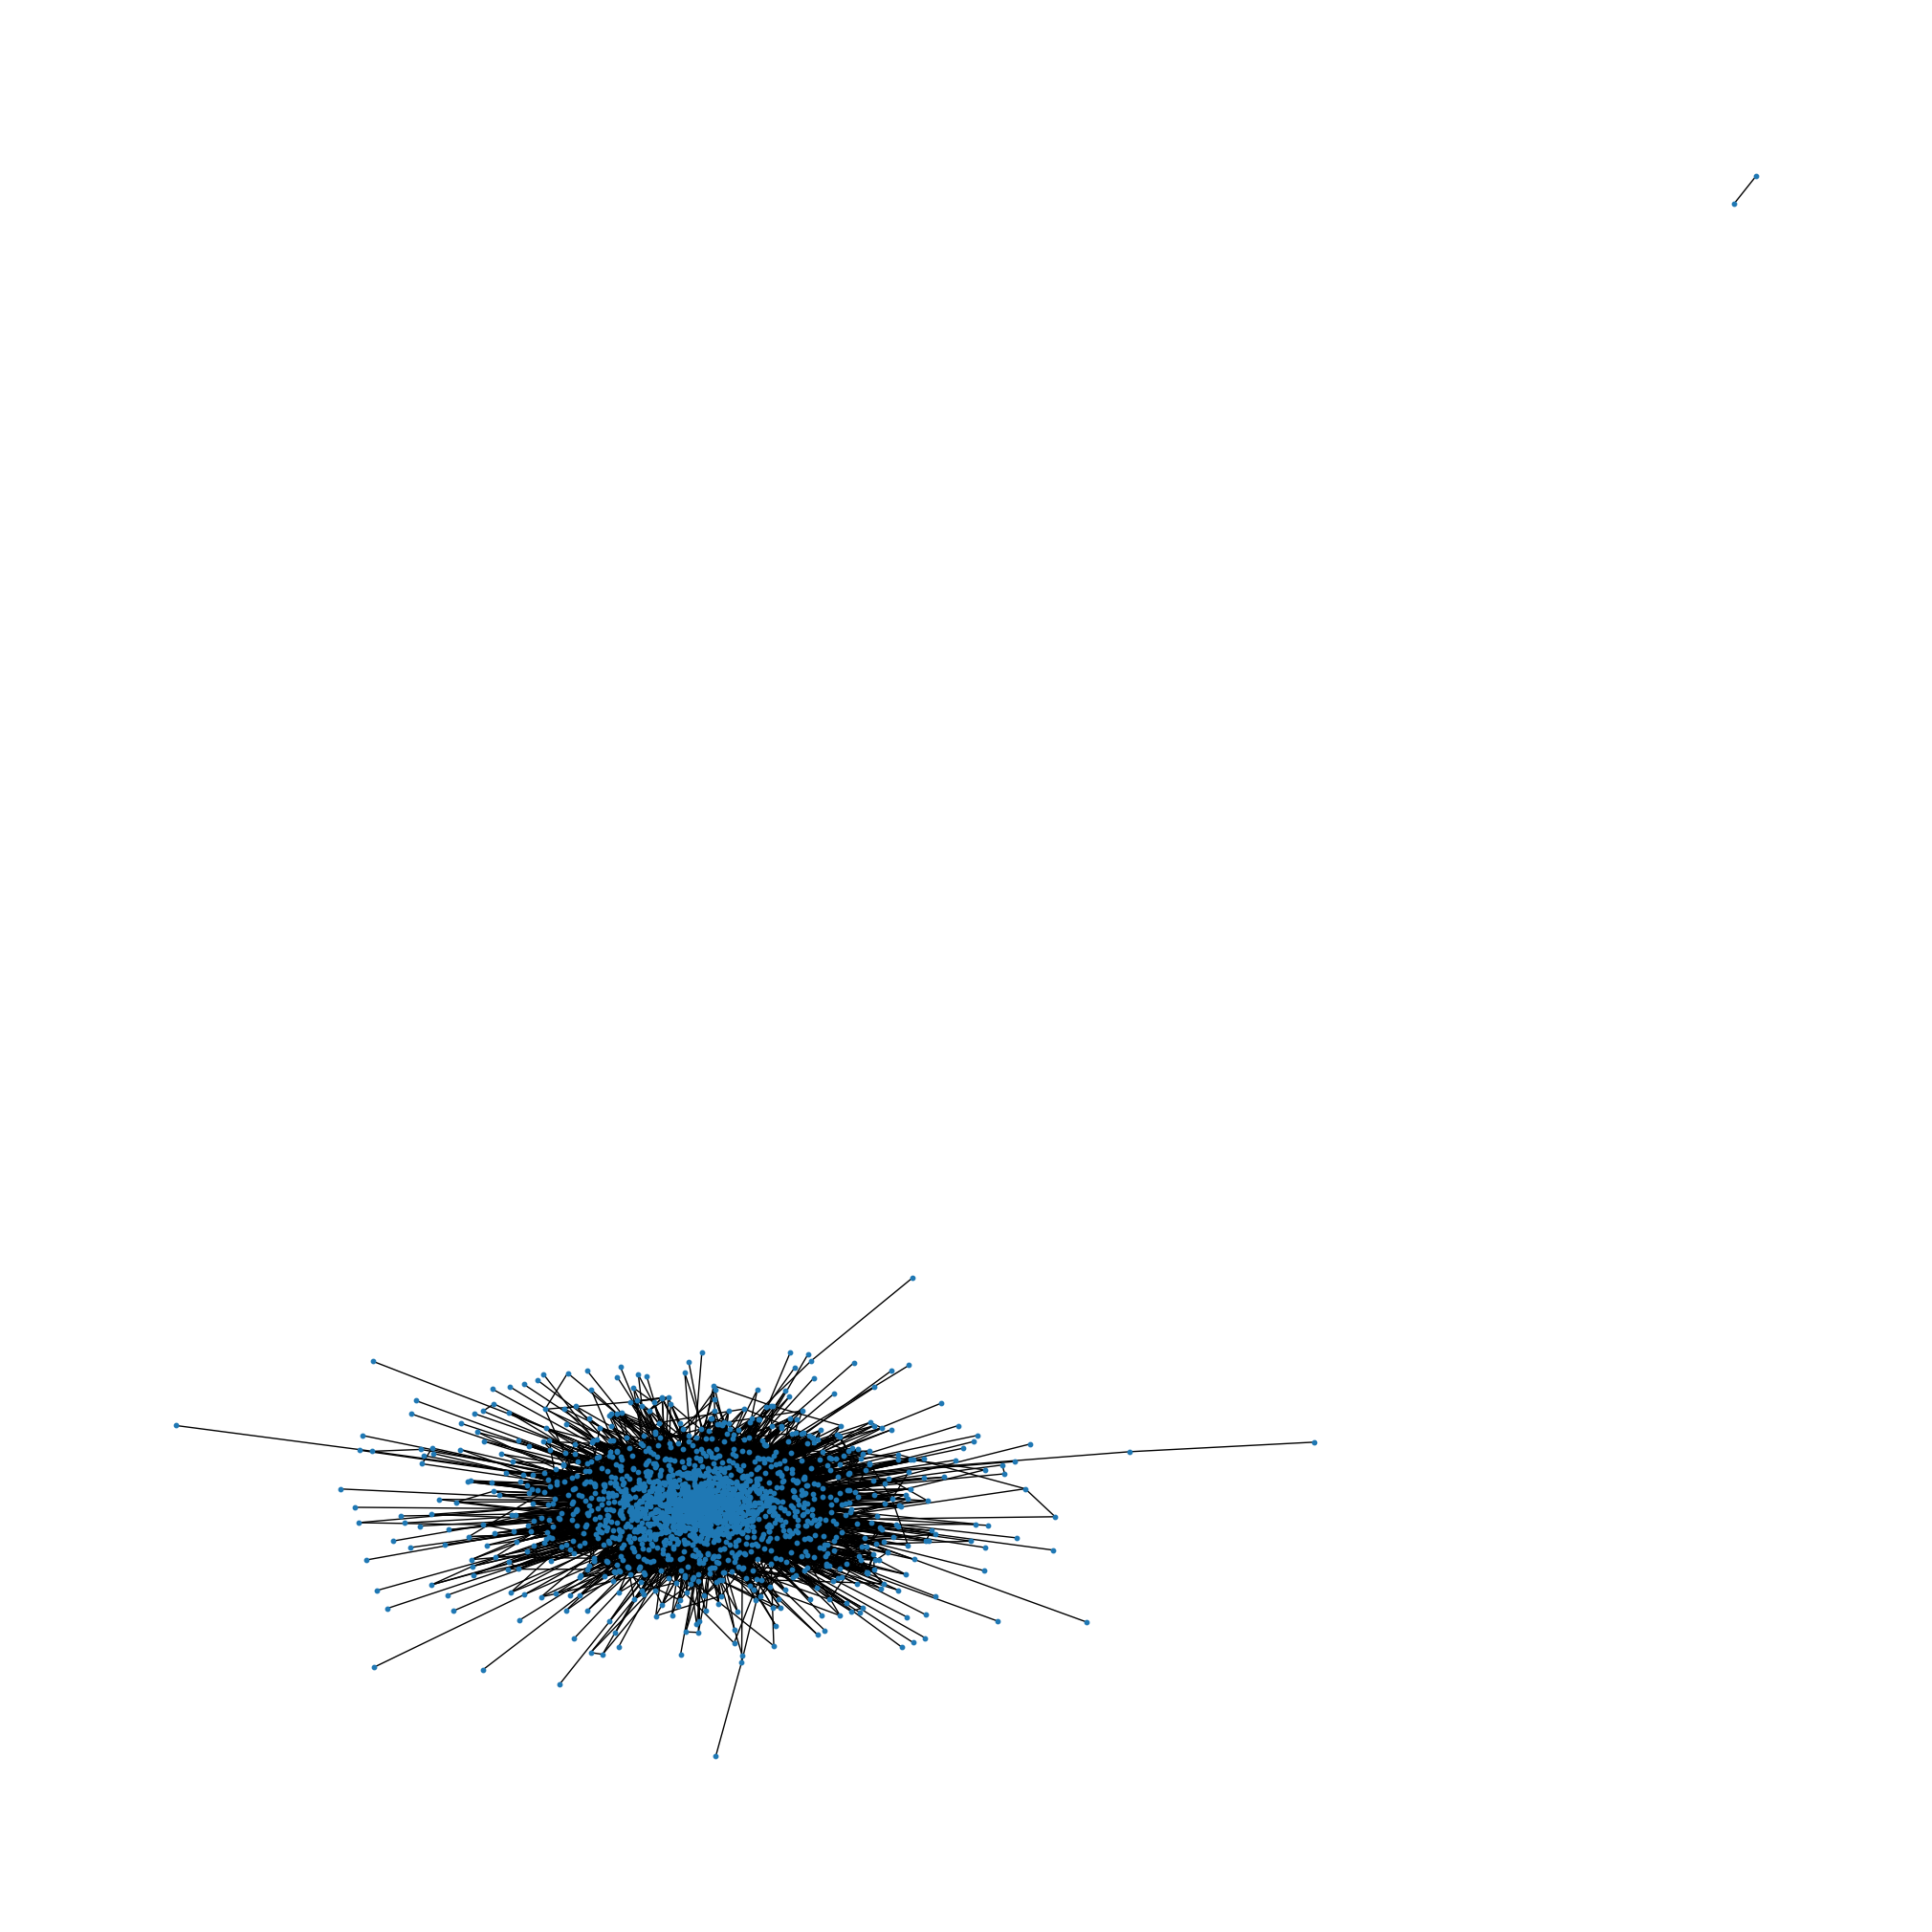

In [67]:
#Sampled in order to visualize something

tr_head = tr.head(10000)

# Create an empty graph
graph = nx.Graph()

# Get the total number of rows in the dataframe for the progress bar
total_rows = len(tr_head)

# Iterate over the ratings dataframe
for _, row in tqdm(tr_head.iterrows(), total=total_rows):
    user_id = row['user_id']
    book_id = row['book_id']
    
    # Find other users who rated the same book
    other_users = tr_head[(tr_head['book_id'] == book_id) & (tr_head['user_id'] != user_id)]['user_id'].tolist()
    
    # Add edges between the current user and other users
    for other_user in other_users:
        graph.add_edge(user_id, other_user)

# Print the number of nodes and edges in the graph
print(len(graph.nodes()))
print(len(graph.edges()))

# visualize the graph
# Draw the graph
plt.figure(figsize=(20, 20))
nx.draw(graph, with_labels=False, node_size=10)
plt.show()

Mean degree for the first 10 nodes: 0.0
Mean degree for the first 10 nodes: 0.0
Mean degree for the first 10 nodes: 0.2


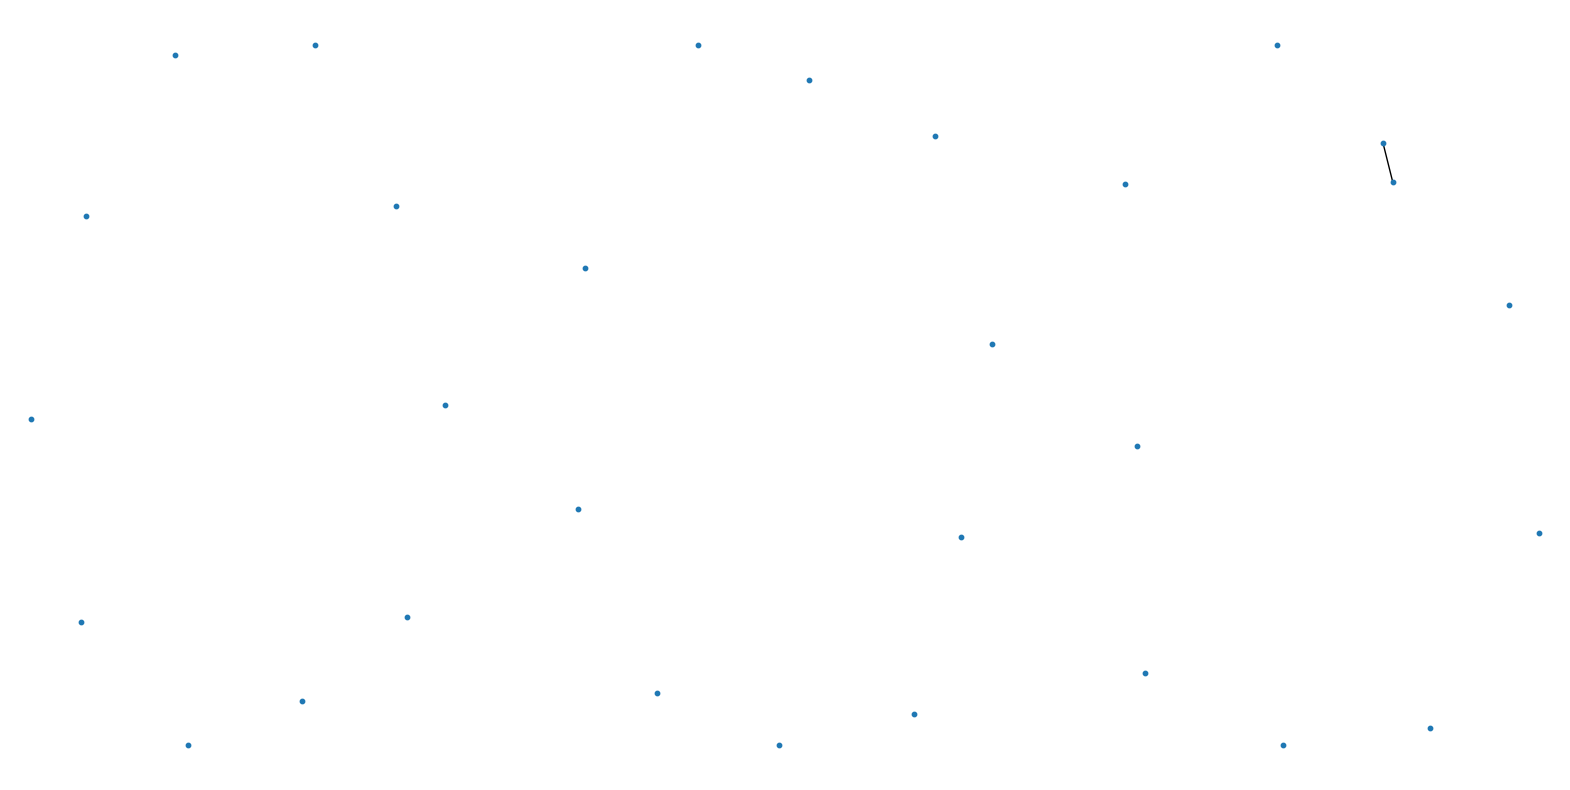

In [68]:
# Plot random subgraph (random nodes) not the first then as above
plt.figure(figsize=(20, 10))

# Iterate over the first 9 subplots
for i in range(3):
    # Take 10 randoms nodes
    sampled_nodes = list(graph.nodes())
    np.random.shuffle(sampled_nodes)
    sampled_nodes = sampled_nodes[:10]

    
    # Create a subgraph with the sampled nodes
    sampled_graph = graph.subgraph(sampled_nodes)

    degree = dict(sampled_graph.degree())
    mean_degree = np.mean(list(degree.values()))
    print(f"Mean degree for the first {len(sampled_nodes)} nodes: {mean_degree}")
    
    # Draw the subgraph and print the mean degree of the nodes present in this sampled graph
    plt.subplot(1, 3, i + 1)
    nx.draw(sampled_graph, with_labels=False, node_size=10)

In [69]:
# Calculate the mean degree of the nodes in the graph
degree = dict(graph.degree())
mean_degree = np.mean(list(degree.values()))
print(f"Mean degree: {mean_degree}")

Mean degree: 68.3485392106612
